# 读书笔记(机器学习实战) | 第10-13章 Keras, Tensorflow和深度神经网络
​
> -   书籍简介: 本书通过使用具体的例子、最少的理论和两个可用于生产的 Python 框架——Scikit-Learn 和 TensorFlow——作者 Aurélien Géron 帮助你直观地了解构建智能系统的概念和工具。你将学习一系列技术，从简单的线性回归开始，逐渐深入到深度神经网络。每章都有练习来帮助你应用所学的知识，你只需要有编程经验就可以开始。
>
> -   代码示例: https://github.com/ageron/handson-ml2
​
# ![研究方向_4](https://jialh.oss-cn-shanghai.aliyuncs.com/img2/研究方向_4.jpg)

## 第10章 Keras人工神经网络简介
- 人工神经网络是深度学习的核心。它们用途广泛、功能强大且可扩展，使其非常适合处理大型和高度复杂的机器学习任务。
- 本章的第一部分介绍了人工神经网络，首先是对第一个人工神经网络(ANN)架构的快速浏览，然后是今天广泛使用的多层感知机(MLP)(其他架构将在第11章中进行探讨)。
- 在第二部分中，我们将研究如何使用流行的Keras API实现神经网络。这是设计精巧、简单易用的用于构建、训练、评估和运行神经网络的API。但是，不要被它的简单性所迷惑：它的表现力和灵活性足以让你构建各种各样的神经网络架构。实际上，对于大多数示例而言，这可能就足够了。
- 如果你需要额外的灵活性，可以随时使用其较低级的API编写自定义的Keras组件，这将在第12章中讨论。

### 10.1 从生物神经元到人工神经元
- 人工神经网络的提出: 于1943年由神经生理学家Warren McCulloch和数学家Walter Pitts首次提出。
- 第三轮人工智能浪潮的优势: (1)大量的可用数据；(2)计算能力的飞速增长；(3)训练算法的改进；(4)理论局限性是良性的(很少会陷入局部最优解)；(5)资金和发展的良性循环。
- **生物神经元**: 生物神经元产生短的电脉冲称为动作电位(AP，或只是信号)，它们沿着轴突传播，使突触释放称为神经递质的化学信号。当神经元在几毫秒内接收到足够数量的这些神经递质时，它会激发自己的电脉冲(实际上，它取决于神经递质，因为其中一些会抑制神经元的发射)。
- **神经元的逻辑计算**: McCulloch和Pitts提出了一个非常简单的生物神经元模型，该模型后来被称为神经元。它具有一个或多个二进制(开/关)输入和一个二进制输出。当超过一定数量的输入处于激活状态时，人工神经元将激活其输出。他们的论文表明即使使用这样的简化模型，也可以构建一个人工神经元网络来计算所需的任何逻辑命题。常见的逻辑操作包括: 恒等、逻辑AND、逻辑OR等。
- **感知机**: 感知器是最简单的人工神经网络之一。感知器的输入和输出是数字(不是二进制开/关值)，并且每个输入连接都与权重相关联。线性阈值单元(TLU)计算其输入的加权和($z=w_1x_1+w_2x_2+...+w_nx_n=\vec x^T\vec w$), 然后将阶跃函数应用于该和并输出结果：$h_w(\vec x)=step(z)$, 其中$z=\vec x^T\vec w$。
    - 阶跃函数: 感知器中最常用的阶跃函数是Heaviside阶跃函数和sgn函数。
        $$
        \begin{equation}
        heaviside(z) =\left\{
        \begin{aligned}
        & 0, &如果z \lt 0 \\
        & 1, &如果z \geq 0
        \end{aligned}
        \right.
        \end{equation}
        $$
        
        $$
        \begin{equation}
        sgn(z) =\left\{
        \begin{aligned}
        & -1, &如果z \lt 0 \\
        & 0,  &如果z = 0 \\
        & +1, &如果z \gt 0 
        \end{aligned}
        \right.
        \end{equation}
        $$
    - 全连接层: 当一层中所有神经元都连接到上一层中的每个神经元(即其输入神经元)时，该层称为全连接层或密集层。计算全连接层的公式为:$h_{W,b}(X)=\phi(XW+b)$, 其中$X$是输入特征矩阵，权重矩阵$W$包含除偏置神经元外的所有连接权重，偏置向量$b$包含偏置神经元和人工神经网络之间的所有连接权重，函数$\phi$称为激活函数。
    - **感知器的训练(Hebb规则)**: 两个神经元同时触发时，它们之间的连接权重会增加。使用Hebb规则的变体训练感知器，该变体考虑了网络进行预测时所犯的错误。感知器学习规则加强了有助于减少错误的连接。更具体地说，感知器一次被送入一个训练实例，并且针对每个实例进行预测。对于产生错误预测的每个输出神经元，它会增强来自输入的连接权重，这些权重将有助于正确的预测。
    - 感知器学习规则(权重更新): $w_{i,j}^{(下一步)} = w_{i,j} + \eta(y_j - \hat y_j)x_i$。第$j$个神经元实际输出$\hat y_i$与目标输出$y_i$的差距$\hat y_i - y_i$越大, 下一步的权重可能越大。
    - **感知器收敛定理**: 对于线性可分数据集感知学习算法原始形式收敛,即经过有限次迭代可以得到一个将训练数据集完全正确划分的分离超平面及感知机模型。https://www.cnblogs.com/LQ6H/p/10739824.html
    - 你可能已经注意到，<font color="red">感知器学习算法非常类似于随机梯度下降。</font>请注意，与逻辑回归分类器相反，感知器不输出分类概率；相反，它们基于硬阈值进行预测。这是逻辑回归胜过感知器的原因。https://cloud.tencent.com/developer/article/1390595
    - **多层感知机(MLP)**: 通过堆叠多个感知器来消除感知器的某些局限性。MLP可以解决XOR问题。https://www.cnblogs.com/orion-orion/p/15895136.html

- **多层感知器和反向传播**: 
    - **反向传播算法**使用有效的技术自动计算梯度下降: 在仅两次通过网络的过程中(一次向前，一次向后), 反向传播算法能够针对每个模型参数计算网络误差的梯度。换句话说，它可以找出应如何调整每个连接权重和每个偏置项以减少误差。一旦获得这些梯度，它便会执行常规的梯度下降步骤，然后重复整个过程，直到网络收敛到解。
    - **自动微分**: 自动计算梯度称为自动微分或者autodiff。有各种autodiff技术，各有优缺点。反向传播使用的一种称为反向模式autodiff。它快速而精确，并且非常适用于微分函数具有多个变量(例如，连接权重)和少量输出(例如，一个损失)的情况。如果你想了解有关autodiff的更多信息，请查看附录D。
    - <font color="red">反向传播算法非常重要，值得再次总结</font>: 对于每个训练实例，反向传播算法首先进行预测(正向传递)并测量误差，然后反向经过每个层以测量来自每个连接的误差贡献(反向传递)，最后调整连接权重以减少错误(梯度下降步骤)。
    - 常见的激活函数:
        - 逻辑(S型)函数: $\sigma(z) = \frac{1}{1+exp(-z)}$
        - 双曲正切函数(The hyperbolic tangent function): $\tanh(z) = 2 \sigma(2z) - 1$
        - 线性整流单位函数(The Rectified Linear Unit function): $ReLU(z) = max(0, z)$
    - <font color="red">为什么需要激活函数</font>: 如果连接多个线性变换，那么得到的只是一个线性变换。因此，如果层之间没有非线性，那么即使是很深的层堆叠也等同于单个层，这样你无法解决非常复杂的问题。相反，具有非线性激活函数的足够大的DNN理论上可以近似任何连续函数。

- **回归MLP**: 首先，MLP可用于回归任务。如果要预测单个值(房屋的价格，给定其许多特征)，则只需要单个输出神经元：其输出就是预测值。对于多元回归(即一次预测多个值)，每个输出维度需要一个输出神经元。
- **分类MLP**: MLP也可以用于分类任务。对于二进制分类问题，你只需要使用逻辑激活函数的单个输出神经元：输出将是0到1之间的数字，你可以将其解释为正类的估计概率。负类别的估计概率等于一减去该数字。

### 10.2 使用Keras实现MLP
- Keras是高级深度学习API，可让你轻松构建、训练、评估和执行各种神经网络。其文档(或规范)可从https://keras.io/获得。
- 使用Keras加载数据集: 当使用Keras而不是Scikit-Learn来加载MNIST或Fashion MNIST时，一个重要的区别是每个图像都表示为28×28阵列，而不是尺寸为784的一维阵列。此外，像素强度表示为整数(从0到255)而不是浮点数(从0.0到255.0)。

tf.__version__: 2.16.1
keras.__version__: 3.3.3
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_train_full.shape: (60000, 28, 28)
X_train_full.dtype: uint8


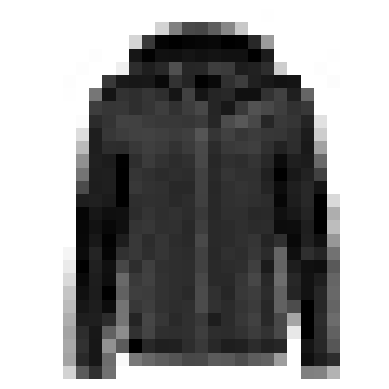

In [1]:
# 加载数据集。
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(f"tf.__version__: {tf.__version__}")
print(f"keras.__version__: {keras.__version__}")

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(f"X_train_full.shape: {X_train_full.shape}")
print(f"X_train_full.dtype: {X_train_full.dtype}")

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


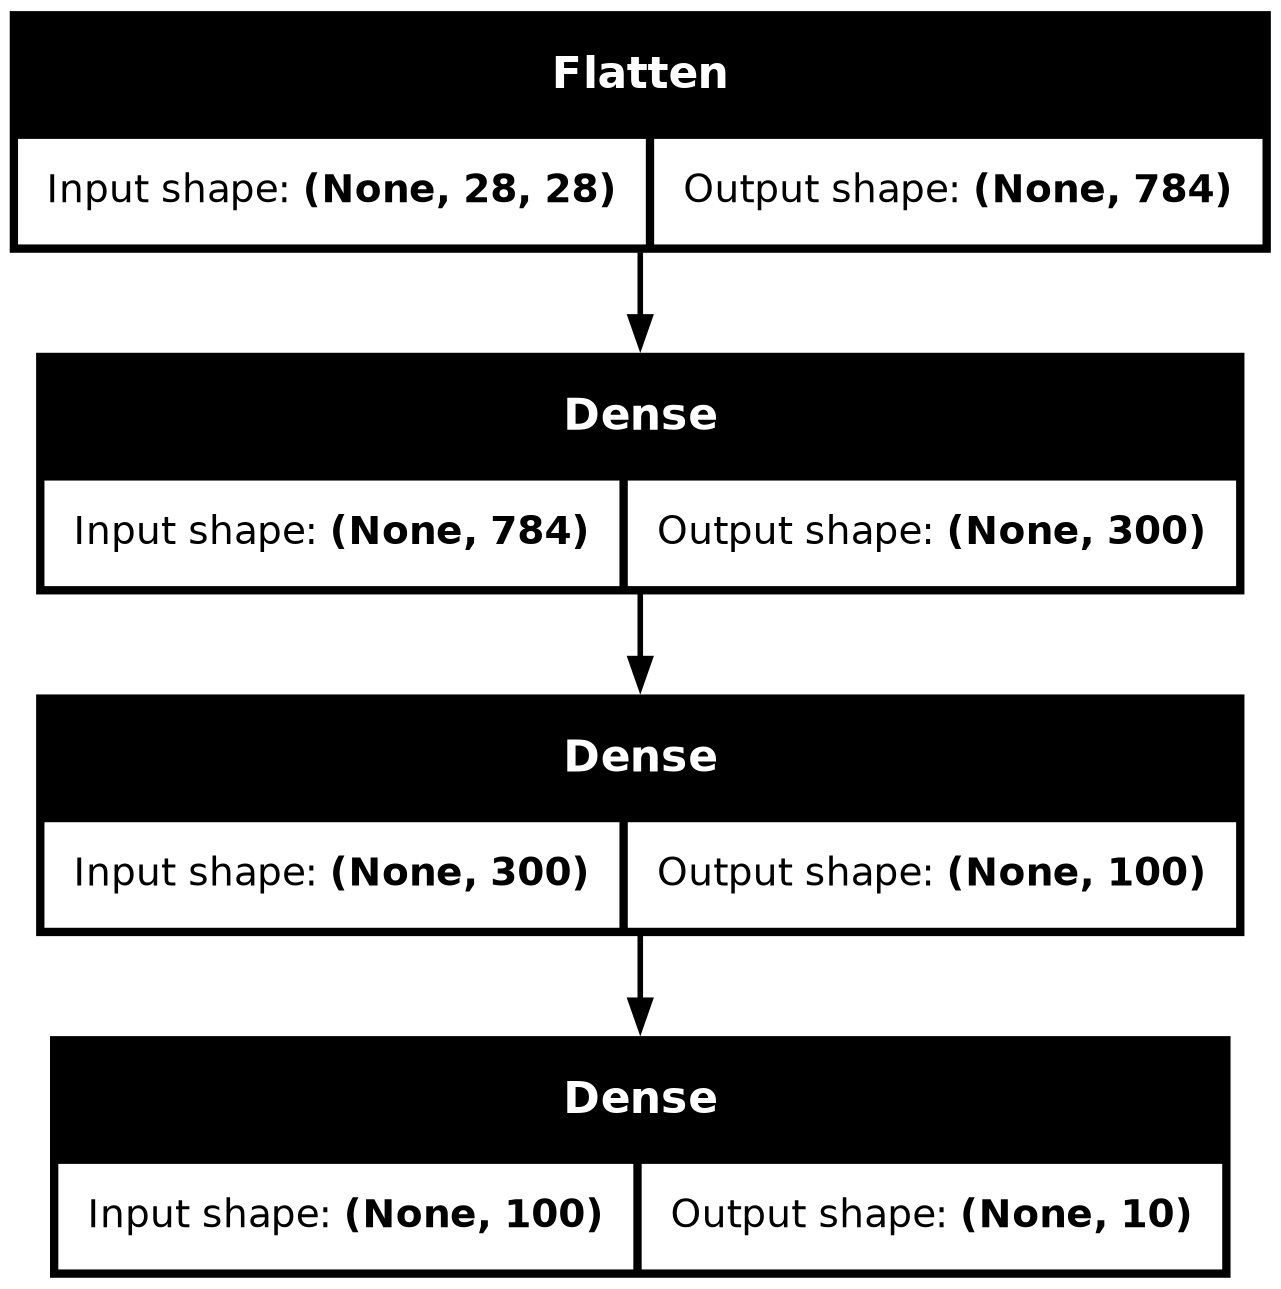

In [2]:
# 使用顺序API创建模型。
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# model.summary(): 模型的summary()方法显示模型的所有层，包括每个层的名称、输出形状、以及参数数量。
# 可以使用get_weights()和set_weights()方法访问层的所有参数。对于密集层，这包括连接权重和偏置项
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [3]:
# 编译模型: 创建模型后，你必须调用compile()方法来指定损失函数和要使用的优化器。
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"]) 

In [4]:
# 训练和评估模型: 只需要调用其fit()方法即可。
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6809 - loss: 1.0002 - val_accuracy: 0.8314 - val_loss: 0.4978
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8256 - loss: 0.5041 - val_accuracy: 0.8374 - val_loss: 0.4533
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8397 - loss: 0.4517 - val_accuracy: 0.8516 - val_loss: 0.4265
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8516 - loss: 0.4261 - val_accuracy: 0.8630 - val_loss: 0.4030
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8588 - loss: 0.4021 - val_accuracy: 0.8636 - val_loss: 0.3888
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8660 - loss: 0.3825 - val_accuracy: 0.8562 - val_loss: 0.4070
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8715 - loss: 0.3655 - val_accuracy: 0.8586 - val_loss: 0.3982
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8717 - loss: 0.3599 - 

Saving figure keras_learning_curves_plot


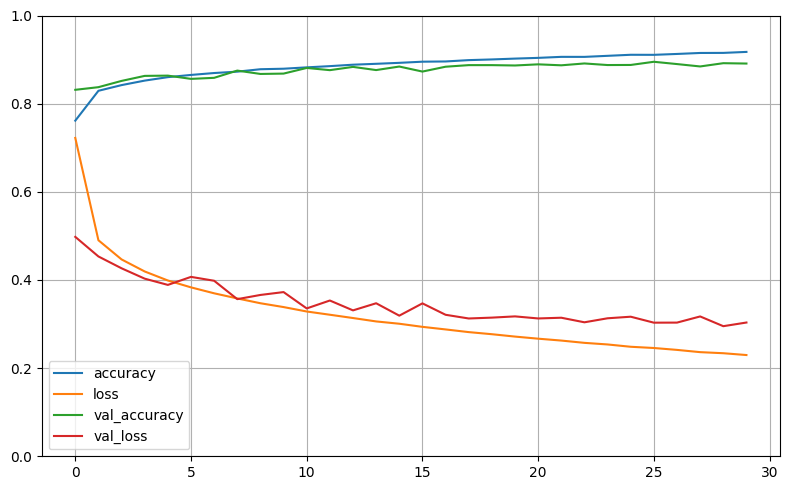

In [5]:
# 绘制学习率曲线
import os
import pandas as pd

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [6]:
# 测试模型
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8802 - loss: 0.3406


[0.3359225392341614, 0.8787000179290771]

In [7]:
# 使用模型进行预测
import numpy as np
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(f"y_proba: {y_proba.round(2)}")
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(f"y_pred: {y_pred}")
print(f"pred_class: {np.array(class_names)[y_pred]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
y_proba: [[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.99]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
y_pred: [9 2 1]
pred_class: ['Ankle boot' 'Pullover' 'Trouser']


- **使用顺序API构建回归多层感知机(MLP)**:  让我们转到加州的住房问题，并使用回归神经网络解决它。

In [8]:
# 加载数据后，我们将其分为训练集、验证集和测试集，然后比例缩放所有特征。
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
housing = fetch_california_housing() 
 
X_train_full, X_test, y_train_full, y_test = train_test_split( 
    housing.data, housing.target) 
X_train, X_valid, y_train, y_valid = train_test_split( 
    X_train_full, y_train_full) 
 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test) 

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 30)        │        270 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 30)        │        930 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer_1[0]… │
│ (Concatenate)       │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model = keras.models.Sequential([ 
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), 
    keras.layers.Dense(1) 
]) 
model.compile(loss="mean_squared_error", optimizer="sgd") 
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid)) 
mse_test = model.evaluate(X_test, y_test) 
X_new = X_test[:3] # pretend these are new instances 
y_pred = model.predict(X_new) 

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0259 - val_loss: 0.9807
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4470 - val_loss: 0.4687
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4141 - val_loss: 0.4370
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4024 - val_loss: 0.4074
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3960 - val_loss: 0.4116
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3921 - val_loss: 0.4045
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3888 - val_loss: 0.4003
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3861 - val_loss: 0.4017
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3835 - val_loss: 0.3954
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3810 - val_loss: 0.3905
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3786 - val_loss: 0.3938
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.

- **使用函数式API构建复杂模型**: 非顺序神经网络的一个示例是“宽深”神经网络。 它将所有或部分输入直接连接到输出层，如图10-14所示。这种架构使神经网络能够学习深度模式(使用深度路径)和简单规则(通过短路径)。
- **使用子类API构建动态模型**: 顺序API和函数式API都是声明性的。首先声明要使用的层以及应该如何连接它们，然后才能开始向模型提供一些数据进行训练或推断。这具有许多优点：<font color="red">可以轻松地保存、克隆和共享模型；可以显示和分析它的结构；框架可以推断形状和检查类型，因此可以及早发现错误(即在任何数据通过模型之前)</font>。
- **保存和还原模型**: 如果需要在大型数据集上进行连续几个小时的训练，你不仅应该在训练结束时保存模型，还应该在训练过程中定期保存检查点，以免在计算机崩溃时丢失所有内容。
- **使用回调函数**: fit()方法接受一个callbacks参数，该参数使你可以指定Keras在训练开始和结束时，每个轮次的开始和结束时(甚至在处理每个批量之前和之后)将调用的对象列表。
- **使用TensorBoard进行可视化**: TensorBoard是一款出色的交互式可视化工具，可用于在训练期间查看学习曲线；比较多次运行的学习曲线；可视化计算图；分析训练统计数据；查看由模型生成的图像；把复杂的多维数据投影到3D，自动聚类并进行可视化，等等！安装TensorFlow时会自动安装此工具，因此你已经拥有了它。

### 10.3 微调神经网络超参数
- 神经网络的灵活性也是它们的主要缺点之一：有许多需要调整的超参数。你不仅可以使用任何可以想象的网络结构，而且即使在简单的MLP中，你也可以更改层数、每层神经元数、每层要使用的激活函数的类型、权重初始化逻辑，以及更多。
- **如何缓解训练速度很慢的问题**: 首先使用宽范围的超参数值快速进行随机搜索，然后使用以第一次运行中找到的最佳值为中心，用较小范围的值运行另一个搜索，以此类推。该方法有望放大一组好的超参数。但是，这非常耗时，也不能最好地利用时间。
- **用于优化超参数的python库**: Hyperopt, Hyperas、kopt或Talos, Keras Tuner, Scikit-Optimize, Spearmint, Hyperband和Sklearn-Deap。
- **隐藏层数目**: 较低的隐藏层对低层结构(例如形状和方向不同的线段)建模，中间的隐藏层组合这些低层结构，对中间层结构(例如正方形、圆形)进行建模，而最高的隐藏层和输出层将这些中间结构组合起来，对高层结构(例如人脸)进行建模。
- **迁移学习**: 这种分层架构不仅可以帮助DNN更快地收敛到一个好的解，而且还可以提高DNN泛化到新数据集的能力。例如，如果你已经训练了一个模型来识别图片中的人脸，并且现在想训练一个新的神经网络来识别发型，则可以通过重用第一个网络的较低层来开始训练。
- **每个隐藏层的神经元数量**: 对于隐藏层，通常将它们调整大小以形成金字塔状，每一层的神经元越来越少，理由是许多低层特征可以合并成更少的高层特征。就像层数一样，你可以尝试逐渐增加神经元的数量，直到网络开始过拟合为止。<font color="red">但是在实践中，选择一个比你实际需要的层和神经元更多的模型，然后使用提前停止和其他正则化技术来防止模型过拟合，通常更简单、更有效(“弹力裤”方法)。</font>
- **学习率、批量大小和其他超参数**： 隐藏层和神经元的数量并不是你可以在MLP中进行调整的唯一超参数。还可以微调学习率、优化器、批量大小、激活函数、迭代次数等参数。
- **大型神经网络的优势**: 大型神经网络几乎永远不会陷入局部极小值，即使陷入了，这些局部最优也几乎与全局最优一样好。但是，它们仍然可能长时间卡在一个平台上。

## 第11章 训练深度神经网络
- 训练深度神经网络(DNN)可能会遇到一些问题: (1)梯度消失或者梯度爆炸问题；(2)没有足够的数据或者缺少标签；(3)训练可能会非常缓慢；(4)过拟合。
- 在本章中，我们将研究所有这些问题，并介绍解决这些问题的技术。我们从探索梯度消失和梯度爆炸问题及其一些受欢迎的解决方法开始。接下来，我们将研究迁移学习和无监督预训练，即使在标签数据很少的情况下，它们也可以帮助你解决复杂的任务。然后我们将讨论可以极大加速训练大型模型的各种优化器。最后我们将介绍一些流行的针对大型神经网络的正则化技术。

### 11.1 梯度消失与梯度爆炸问题
- 在反向传播中，随着算法向下传播到较低层，梯度通常会越来越小。结果梯度下降更新使较低层的连接权重保持不变，训练不能收敛到一个良好的解。我们称其为**梯度消失问题**。
- 在某些情况下，可能会出现相反的情况：梯度可能会越来越大，各层需要更新很大的权重直到算法发散为止。这是**梯度爆炸问题**，它出现在递归神经网络中(见第15章)。
- Glorot和Bengio在它们的论文中提出了一种能**显著缓解不稳定梯度问题**的方法。他们指出，我们需要信号在两个方向上正确流动：进行预测时，信号为正向；在反向传播梯度时，信号为反向。我们既不希望信号消失，也不希望它爆炸并饱和。为了使信号正确流动，作者认为，我们需要<font color="red">每层输出的方差等于其输入的方差</font>[2]，并且我们需要在反方向时流过某层之前和之后的梯度具有相同的方差(如果你对数学细节感兴趣，请查看本论文)。https://blog.csdn.net/sinat_34072381/article/details/108426725
- **Xavier初始化或者Glorot初始化(核心思想是保持每一层输出的方差与输入的方差一致)**: 使用逻辑激活函数时，Glorot初始化要求服从均值为0，方差为$\sigma^2=\frac{1}{fan_{avg}}$, 均值为0的正态分布。或者服从$[-r, r]$的均匀分布，其中$r=\sqrt{\frac{3}{fan_{avg}}}$。其中$fan_{avg}=\frac{fan_{in}+fan_{out}}{2}$。
- **LeCun初始化**: 将Glorot初始化中的$fan_{avg}$替换为$fan_{in}$。当$fan_{in}=fan_{out}$时，LeCun初始化等于Glorot初始化。

- **激活函数**: sigmoid的激活函数、ReLU激活函数、Leaky ReLU、指数线性单位(Exponential Linear Unit，ELU)、可拓展的ELU(Scaled ELU, SELU)。
- 尽管将He初始化与ELU(或ReLU的任何变体)一起使用可以显著减少在训练开始时的梯度消失/梯度爆炸问题的危险，但这并不能保证它们在训练期间不会再出现。
- **批量归一化(BN)的技术**： 该技术包括在模型中的每个隐藏层的激活函数之前或之后添加一个操作。该操作对每个输入零中心并归一化，然后每层使用两个新的参数向量缩放和偏移其结果：一个用于缩放，另一个用于偏移。换句话说，<font color="red">该操作可以使模型学习各层输入的最佳缩放和均值。</font>在许多情况下，如果你将BN层添加为神经网络的第一层，则无须归一化训练集(例如，使用StandardScaler)；BN层会为你完成此操作(因为它一次只能查看一个批次，它还可以重新缩放和偏移每个输入特征)。
- **批量归一化的参数估计**: 为了使输入零中心并归一化，该算法需要估计每个输入的均值和标准差。通过评估当前小批次上的输入的均值和标准差(因此称为“批量归一化”)来做到这一点。大多数批量归一化的实现都是通过使用该层输入的均值和标准差的移动平均值来估计训练期间的最终统计信息。这是Keras在使用BatchNormalization层时自动执行的操作。
- **在批量归一化中，每个批归一化层学习了四个参数向量**：通过常规反向传播学习γ(输出缩放向量)和β(输出偏移向量)，和使用指数移动平均值估计的μ(最终的输入均值向量)和σ(最终输入标准差向量)。请注意，μ和σ是在训练期间估算的，但仅在训练后使用(以替换方程式11-3中的批量输入均值和标准差)。
- **梯度裁剪**: 缓解梯度爆炸问题的另一种流行技术是在反向传播期间裁剪梯度，使它们永远不会超过某个阈值。这称为梯度裁剪[12]。这种技术最常用于循环神经网络，因为在RNN中难以使用批量归一化，正如我们将在第15章中看到的那样。对于其他类型的网络，BN通常就足够了。

### 11.2 重用预训练层
- 从头开始训练非常大的DNN通常不是一个好主意：相反，你应该总是试图找到一个现有的与你要解决的任务相似的神经网络(我们将在第14章讨论如何找到它们)，然后重用该网络的较低层。此技术称为**迁移学习**。它不仅会大大加快训练速度，而且会大大减少训练数据。
- **用Keras进行迁移学习**： 假设Fashion MNIST数据集仅包含8个类别，例如，除凉鞋和衬衫之外的所有类别。有人在该数据集上建立并训练了Keras模型，并获得了相当不错的性能(精度>90％)。我们将此模型称为A。你现在要处理另一项任务：你有凉鞋和衬衫的图像，想要训练一个二元分类器(正=衬衫，负=凉鞋)。你的数据集非常小，只有200张带标签的图像。我们可以将8个类别上训练的模型A迁移到凉鞋和衬衫图像，以提高泛化能力。

In [11]:
from tensorflow import keras
import numpy as np
import tensorflow as tf

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
# 拆分fashion MNIST数据集
# 使X_train_A包含除衬衫和凉鞋外的所有类, X_train_B包含衬衫和凉鞋的前200张图片。
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [13]:
tf.random.set_seed(42)
np.random.seed(42)

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

model_A.save("my_model_A.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7344 - loss: 0.8224 - val_accuracy: 0.8640 - val_loss: 0.3853
Epoch 2/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8717 - loss: 0.3649 - val_accuracy: 0.8832 - val_loss: 0.3331
Epoch 3/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8833 - loss: 0.3227 - val_accuracy: 0.8936 - val_loss: 0.3104
Epoch 4/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8905 - loss: 0.3021 - val_accuracy: 0.8966 - val_loss: 0.2966
Epoch 5/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8973 - loss: 0.2884 - val_accuracy: 0.8999 - val_loss: 0.2867
Epoch 6/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9022 - loss: 0.2782 - val_accuracy: 0.9028 - val_loss: 0.2785
Epoch 7/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9058 - loss: 0.2699 - val_accuracy: 0.9053 - val_loss: 0.2727
Epoch 8/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9087 - loss: 0.2631 - 

In [14]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4560 - loss: 0.8511 - val_accuracy: 0.6744 - val_loss: 0.6198
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7999 - loss: 0.5607 - val_accuracy: 0.8215 - val_loss: 0.4947
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8904 - loss: 0.4491 - val_accuracy: 0.8651 - val_loss: 0.4210
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9125 - loss: 0.3794 - val_accuracy: 0.9067 - val_loss: 0.3665
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9438 - loss: 0.3268 - val_accuracy: 0.9351 - val_loss: 0.3238
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9546 - loss: 0.2854 - val_accuracy: 0.9503 - val_loss: 0.2897
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9684 - loss: 0.2525 - val_accuracy: 0.9594 - val_loss: 0.2621
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9754 - loss: 0.2262 - val_accuracy: 0.9736 - val_loss: 0.2392


**开始进行迁移学习**: 

In [15]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5239 - loss: 0.8114 - val_accuracy: 0.5639 - val_loss: 0.8253
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5362 - loss: 0.7705 - val_accuracy: 0.5801 - val_loss: 0.7873
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5381 - loss: 0.7325 - val_accuracy: 0.5953 - val_loss: 0.7520
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5653 - loss: 0.6973 - val_accuracy: 0.6197 - val_loss: 0.7190
Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6681 - loss: 0.6030 - val_accuracy: 0.7718 - val_loss: 0.4562
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8285 - loss: 0.3895 - val_accuracy: 0.8590 - val_loss: 0.3297
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9042 - loss: 0.2825 - val_accuracy: 0.9026 - val_loss: 0.2558
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9211 - loss: 0.2188 - val_accuracy: 0.9270 - val_loss: 0.2086
Epoc

In [16]:
model_B.evaluate(X_test_B, y_test_B)
model_B_on_A.evaluate(X_test_B, y_test_B)
dropped_error_rate = (100 - 97.05) / (100 - 99.40)
print(f"dropped_error_rate: {dropped_error_rate}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9892 - loss: 0.1169
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9851 - loss: 0.0719
dropped_error_rate: 4.916666666666718


- **迁移学习的特点**: 事实证明，迁移学习在小型密集型网络中不能很好地工作，大概是因为小型网络学习的模式很少，密集网络学习的是非常特定的模式，这在其他任务中不是很有用。<font color="red">迁移学习最适合使用深度卷积神经网络，该神经网络倾向于学习更为通用的特征检测器(尤其是在较低层)。</font>我们将在第14章中使用刚刚讨论的技术重新审视迁移学习(我保证，这一次不会作弊！)。
- **无监督预训练**: 当你要解决的任务很复杂，没有可重复使用的相似模型，标签的训练数据很少，但是无标签的训练数据很多时，无监督预训练(今天通常使用自动编码器或GAN而不是RBM)仍然是一个不错的选择。
- **辅助任务的预训练**: 人脸识别系统中判断两张照片是否属于同一人; 自然语言处理(NLP)任务中，随机屏蔽一些单词并训练模型来预测缺失的单词。

### 11.3 更快的优化器
- 训练一个非常大的深度神经网络可能会非常缓慢。到目前为止，我们已经知道了四种加快训练速度(并获得了更好的解决方法)的方法：(1)对连接权重应用一个良好的初始化策略，(2)使用良好的激活函数，(3)使用批量归一化，以及(4)重用预训练网络的某些部分(可能建立在辅助任务上或使用无监督学习)。
- 与常规的梯度下降优化器相比，使用更快的优化器也可以带来巨大的速度提升。在本节中，我们将介绍最受欢迎的算法：动量优化、Nesterov加速梯度、AdaGrad、RMSProp，最后是Adam和Nadam优化。

![](https://jialh.oss-cn-shanghai.aliyuncs.com/img2/image-20241003112027533.png)

- **学习率调度**: 常见的学习率调度方法包括幂调度、指数调度、分段恒定调度、性能调度、1周期调度等。实际中最常用的是指数调度，因为它易于微调，比最优解决方法收敛速度更快。
- 最后，tf.keras提供了另一种实现学习率调度的方法：使用`keras.optimizers.schedule`中可以使用的调度之一来定义学习率，然后将该学习率传递给任意优化器。这种方法在每个步骤更新学习率而不是每个轮次。例如，以下是实现与我们先前定义的`exponential_decay_fn()`函数相同的指数调度的方法：
```python
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32) 
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1) 
optimizer = keras.optimizers.SGD(learning_rate) 
```

### 11.4 通过正则化避免过拟合
- 我们已经在第10章中实现了最好的正则化技术之一：提前停止。而且，即使“批量归一化”被设计用来解决不稳定的梯度问题，它的作用也像一个很好的正则化。在本节中，我们将研究其他流行的神经网络正则化技术：**$l_1$和$l_2$正则化、dropout和最大范数正则化**。
```python
layer = keras.layers.Dense(100, activation="elu", 
                           kernel_initializer="he_normal", 
                           kernel_regularizer=keras.regularizers.l2(0.01)) 
# 如果要使用l1正则化
keras.regularizers.l1()
# 如果要同时使用l1和l2正则化
keras.regularizers.l1_l2()
```

- **dropout**: 经过dropout训练的神经元不能与其相邻的神经元相互适应，它们必须自己发挥最大的作用。它们也不能过分依赖少数输入神经元，它们必须注意每个输入神经元。它们最终对输入的微小变化不太敏感。<font color="red">最后，你将获得一个更有鲁棒性的网络，该网络有更好的泛化能力。</font>
- **蒙特卡罗(MC)dropout**: MC Dropout技术可以提高任何训练后的dropout模型的性能，而无须重新训练甚至根本不用修改它，它可以很好的测量模型的不确定性，并且实现起来很简单。
- **蒙特卡罗(MC)dropout的优势**: 对具有dropout功能的多个预测进行平均，这使蒙特卡罗估计通常比关闭dropout的单个预测的结果更可靠。
- **最大范数正则化**: 对于神经网络而言，另一种流行的正则化技术称为最大范数正则化：对于每个神经元，它会限制传入连接的权重$w$，使得$||w||_2≤r$，其中$r$是最大范数超参数， $||\cdot||$是$l_2$范数。

### 11.5 总结和实用指南
- 在本章中，我们涵盖了广泛的技术，你可能想知道应该使用哪种技术。这取决于任务，还没有明确的共识，但是我发现表11-3中的配置在大多数情况下可以很好地工作，而无须进行大量的超参数调整。也就是说，请不要将这些默认值视为硬性规定！
- 虽然先前的指南应该能涵盖大多数情况，但以下是一些例外情况：(1)构建稀疏模型；(2)构建低延迟模型；(3)构建风险敏感的应用。

## 第12章 使用TensorFlow自定义模型和训练
- 到目前为止，我们仅仅使用了TensorFlow的高层API tf.keras，但它已经使我们走得很远了：我们构建了各种神经网络架构，包括回归和分类网络宽深网络以及自归一化网络，使用了各种技术，例如批归一化、dropout和学习率调度。实际上，你遇到的情况中有95％不需要tf.keras(和tf.data，见第13章)以外的任何内容。
- 但是现在是时候深入研究TensorFlow并了解其底层Python API了。当你需要额外的控制来编写自定义损失函数、自定义指标、层、模型、初始化程序、正则化函数、权重约束等时，这将非常有用。你甚至可能需要完全控制训练循环本身，例如对梯度使用特殊的变换或约束(不仅仅对它们进行裁剪)，或者对网络的不同部分使用多个优化器。我们将在本章介绍所有这些情况，还将探讨如何使用TensorFlow的自动图形生成功能来增强自定义模型和训练算法。

### 12.1 TensorFlow快速浏览

TensorFlow是一个强大的用于数值计算的库，特别适合大规模机器学习并对其进行了微调(但你可以将其用于需要大量计算的任何其他操作)。那么TensorFlow提供什么？总结如下：
- 它的核心与NumPy非常相似，但具有GPU支持。
- 它支持分布式计算(跨多个设备和服务器)。
- 它包含一种即时(JIT)编译器，可使其针对速度和内存使用情况来优化计算。它的工作方式是从Python函数中提取计算图，然后进行优化(通过修剪未使用的节点)，最后有效地运行它(通过自动并行运行相互独立的操作)。
- 计算图可以导出为可移植格式，因此你可以在一个环境中(例如在Linux上使用Python)训练TensorFlow模型，然后在另一个环境中(例如在Android设备上使用Java)运行TensorFlow模型。
- 它实现了自动微分(autodiff)(见第10章和附录D)，并提供了一些优秀的优化器，例如RMSProp和Nadam(见第11章)，因此你可以轻松地最小化各种损失函数。

TensorFlow在这些核心功能的基础上提供了更多功能：最重要的当然是`tf.keras`，但它还具有数据加载和预处理操作(`tf.data`、`tf.io`等)、图像处理操作(`tf.image`)、信号处理操作(`tf.signal`)等(有关TensorFlow的Python API的概述见图12-1)。

### 12.2 像NumPy一样使用TensorFlow
- **张量和操作**:
```python
tf.constant()
# 基本运算
tf.add()
tf.multiply()
tf.square()
tf.exp()
tf.sqrt()
tf.reshape()
tf.squeeze()
tf.tile()
tf.reduce_mean()
tf.reduce_sum()
tf.reduce_max()
tf.math.log()
# 类型转换
tf.cast()
# 变量
tf.Variable()
tf.Tensor()
```
- TensorFlow支持其他几种数据结构，包括以下内容: 稀疏张量（tf.SparseTensor）、张量数组（tf.TensorArray）、不规则张量（tf.RaggedTensor）、字符串张量、集合和队列。

### 12.3 定制模型和训练算法
- **自定义损失函数**: `model.compile(loss=huber_fn, optimizer="nadam")`
- **保存和加载包含自定义组件的模型**: 
```python
model = keras.models.load_model("my_model_with_a_custom_loss.h5", 
                                custom_objects={"huber_fn": huber_fn}) 
# 加载时设置默认参数
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5", 
                                custom_objects={"huber_fn": create_huber(2.0)}) 
```
- **自定义激活函数、初始化、正则化和约束**: 大多数Keras功能，例如损失、正则化、约束、初始化、度量、激活函数、层甚至完整模型，都可以以几乎相同的方式进行自定义。在大多数情况下，你只需要编写带有适当输入和输出的简单函数即可。
```python
def my_softplus(z): # return value is just tf.nn.softplus(z) 
    return tf.math.log(tf.exp(z) + 1.0)  
def my_glorot_initializer(shape, dtype=tf.float32): 
    stddev = tf.sqrt(2. / (shape[0] + shape[1])) 
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)  
def my_l1_regularizer(weights): 
    return tf.reduce_sum(tf.abs(0.01 * weights)) 
def my_positive_weights(weights): # return value is just tf.nn.relu(weights) 
    return tf.where(weights < 0., tf.zeros_like(weights), weights)
```
- **自定义指标**:
```python
class HuberMetric(keras.metrics.Metric): 
    def __init__(self, threshold=1.0, **kwargs): 
        super().__init__(**kwargs) # handles base args (e.g., dtype) 
        self.threshold = threshold 
        self.huber_fn = create_huber(threshold) 
        self.total = self.add_weight("total", initializer="zeros") 
        self.count = self.add_weight("count", initializer="zeros") 
    def update_state(self, y_true, y_pred, sample_weight=None): 
        metric = self.huber_fn(y_true, y_pred) 
        self.total.assign_add(tf.reduce_sum(metric)) 
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32)) 
    def result(self): 
        return self.total / self.count 
    def get_config(self): 
        base_config = super().get_config() 
        return {**base_config, "threshold": self.threshold} 
```
- **自定义层**: 
```python
class MyDense(keras.layers.Layer): 
    def __init__(self, units, activation=None, **kwargs): 
        super().__init__(**kwargs) 
        self.units = units 
        self.activation = keras.activations.get(activation) 
 
    def build(self, batch_input_shape): 
        self.kernel = self.add_weight( 
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal") 
        self.bias = self.add_weight( 
            name="bias", shape=[self.units], initializer="zeros") 
        super().build(batch_input_shape) # must be at the end 
 
    def call(self, X): 
        return self.activation(X @ self.kernel + self.bias) 
 
    def compute_output_shape(self, batch_input_shape): 
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units]) 
 
    def get_config(self): 
        base_config = super().get_config() 
        return {**base_config, "units": self.units, 
                "activation": keras.activations.serialize(self.activation)} 
```
- **自定义模型**: 继承keras.Model类，在构造函数中创建层和变量，并实现`call()`方法来执行你希望模型执行的任何操作。
- **基于模型内部的损失和指标**: 继承keras.Model类，在构造函数中创建层和变量，并实现`call()`来执行你希望模型执行的任何操作。例如自编码器中会<font color="red">计算重建与输入之间的均方差</font>。通过将这种重建损失添加到主要损失中，我们鼓励模型通过隐藏层保留尽可能多的信息，即使对回归任务本身没有直接用处的信息。实际中，这种损失有时会提高泛化性（这是正则化损失）。
- **使用自动微分计算梯度**: 在神经网络中，通过在调整相应参数时测量函数输出的变化来计算每个偏导数的近似值。
- **自定义训练循环**: 在极少数情况下，`fit()`方法可能不够灵活而无法满足你的需要。但是请记住，编写自定义训练循环会使你的代码更长、更容易出错并且更难以维护。

### 12.4 TensorFlow函数和图
- TensorFlow可以优化计算图，修剪未使用的节点，简化表达式（例如1+2将替换为3），等等。准备好优化的图后，TF函数会以适当的顺序（并在可能时并行执行）有效地执行图中的操作。因此TF函数通常比原始的Python函数运行得更快，尤其是在执行复杂计算[1]的情况下。大多数时候，你并不需要真正了解很多：当你想增强Python函数时，只需将其转换为TF函数即可。
- 在大多数情况下，将执行TensorFlow操作的Python函数转换为TF函数很简单：用@tf.function修饰它或让Keras替你处理。

## 第13章 使用TensorFlow加载和预处理数据
- 到目前为止，我们仅使用了适合放入内存的数据集，但是深度学习系统经常在非常大的数据集上训练，而这些数据集不能完全放入RAM。读取大型数据集并对其进行有效预处理可能对其他深度学习库来说很难实现，但是TensorFlow借助Data API很容易实现：只需创建一个数据集对象，并告诉它从何处获取数据以及如何对其进行转换。TensorFlow负责所有细节的实现，例如多线程、队列、批处理和预取。此外，Data API与tf.keras无缝协同工作！
- 有效读取大数据集并不是唯一的难点：数据也需要进行预处理，通常是归一化的。而且，它并不总是严格地由数字字段组成，可能存在文本特征、分类特征等。这些需要进行编码、例如使用独热编码、词袋编码或嵌入（如我们将要看到的，嵌入是一种可训练的密集向量，表示类别或令牌）。处理所有这些预处理的一种方法是编写自己的自定义预处理层，也可以使用Keras提供的标准预处理层。
- 在本章中，我们将介绍Data API、TFRecord格式以及如何创建自定义预处理层，还将介绍如何使用标准Keras层。下面快速浏览TensorFlow生态系统中的一些相关项目：TF Transform (tf.Transform); TF Datasets (TFDS)。

### 13.1 数据API
- 整个数据API都围绕着数据集的概念：你可能会怀疑，这代表了数据元素的一个序列。
- 数据API的主要操作包括: 
    - 读取: `tf.data.Dataset.from_tensor_slices()`
    - 链式转换: `dataset = dataset.repeat(3).batch(7) `
    - 乱序数据: `dataset = dataset.shuffle(buffer_size=5, seed=42).batch(7)`
    - 预处理数据: `(x - X_mean) / X_std, y`
    - 合并在一起: `dataset = dataset.interleave(...)`
    - 预取(提前准备一个批次): `dataset.batch(batch_size).prefetch(1) `
- 和tf.keras一起使用数据集: 现在我们可以使用csv_reader_dataset（）函数为训练集创建数据集。

### 13.2 TFRecord格式
- TFRecord格式是TensorFlow首选的格式，用于存储大量数据并有效读取数据。这是一种非常简单的二进制格式，只包含大小不同的二进制记录序列（每个记录由一个长度、一个用于检查长度是否损坏的CRC校验和、实际数据以及最后一个CRC校验和组成）。你可以使用`tf.io.TFRecordWriter`类轻松创建TFRecord文件。

### 13.3 预处理输入特征
- 为神经网络准备数据需要将所有特征转换为数值特征，通常将其归一化等。特别是如果你的数据包含分类特征或文本特征，则需要将它们转换为数字。在准备数据文件时，可以使用任何你喜欢的工具（例如NumPy、pandas或Scikit-Learn）提前完成此操作。或者，你可以在使用Data API加载数据时动态地预处理数据（例如使用数据集的`map()`方法，如我们之前看到的），也可以在模型中直接包含预处理层。现在让我们来看最后一个选项。
- 常见的预处理方法包括独热编码、嵌入编码、Keras预处理层。
```python
# 使用独热向量编码分类特征
cat_one_hot = tf.one_hot(cat_indices, depth=len(vocab) + num_oov_buckets)
# 使用嵌入编码分类特征: tf.nn.embedding_lookup（）函数以给定的索引查找在嵌入矩阵中的行，这就是它所做的全部。
# 当keras.layers.TextVectorization层可用时，你可以调用其adapt()方法以使其从一个数据样本中提取词汇表（它会为你创建查找表）。
tf.nn.embedding_lookup(embedding_matrix, cat_indices)
# Keras预处理层: keras.layers.Normalization层和keras.layers.TextVectorization层。还包括keras.layers.Discretization层，它将连续的数据切成不同的离散块，并将每个块编码为一个独热向量。
normalization = keras.layers.Normalization() 
discretization = keras.layers.Discretization([...]) 
pipeline = keras.layers.PreprocessingStage([normalization, discretization]) 
pipeline.adapt(data_sample) 
```

### 13.4 TF Transform
- 如果预处理是计算密集的，那么在训练之前（而不是即时）进行处理会大大提高速度：在训练之前，每个实例对数据进行一次预处理，而不是在训练期间每个实例进行一次数据预处理。
- **添加额外的预处理层**: 采用经过训练的模型（采用由Apache Beam或Spark代码预处理过的数据进行训练），并在将其部署到你的应用程序或浏览器之前，添加额外的预处理层来进行实时预处理。那肯定会更好一些，因为现在你有两个版本的预处理代码：Apache Beam代码或Spark代码以及预处理层的代码。

### 13.5 TensorFlow数据集项目
- TensorFlow数据集（TFDS）项目使下载通用数据集变得非常容易，从小型数据集（如MNIST或Fashion MNIST）到大型数据集（如ImageNet）（你需要大量的磁盘空间）。该列表包括图像数据集、文本数据集（包括翻译数据集）以及音频和视频数据集。你可以访问https://homl.info/tfds 来查看完整列表以及每个数据集的描述。
- 使用方法: 安装tensorflow_datasets库，然后调用`tfds.load()`函数，下载你想要的数据，并将该数据作为数据集的目录返回。